In [1]:
import pandas as pd
import numpy as np
from pyemd import emd_samples
from scipy import signal
import plotly.graph_objects as go
from IPython.display import display

# To import packages from the parent directory
import sys
sys.path.insert(0,'..')

# Autoreload allows us to update our code mid-notebook
%load_ext autoreload
%autoreload 2

# Our code
from main import processing, visualization

In [2]:
# file_path = '../data/sample_morphologies.pickle'
# file_path = '../data/20200423-1804_states.pickle'
file_path = '../data/20200628-1935_states.pickle'
df = pd.read_pickle(file_path)
print(f'Length of df: {len(df)}')

Length of df: 3017


In [3]:
final_states = []
for grouping, group in df.groupby(['BR', 'CHI', 'version']):
    final_state = group[group.timestep == max(group.timestep)].iloc[0]
    final_states.append(final_state)
    
df_finals = pd.DataFrame(final_states)

In [5]:
sample = df_finals.iloc[0]

In [9]:
display(
    visualization.get_image_figure(
        np.array(sample.image).reshape((100, 400))
    )
)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

In [23]:
components = processing.extract_components(
    processing.binarize(
        np.array(sample.image).reshape((100, 400))
    )
)

In [33]:
display(visualization.get_image_figure(components[17]))

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

In [34]:
processing.euler_number_sig(components[17])

0

# Collect Signatures

In [219]:
thresh = 0.5

df_sigs = df_finals.copy()
df_sigs['area_sig'] = np.empty(len(df_sigs), dtype=np.object)
df_sigs['perimeter_sig'] = np.empty(len(df_sigs), dtype=np.object)
df_sigs['euler_sig'] = np.empty(len(df_sigs), dtype=np.object)
df_sigs['length_sig'] = np.empty(len(df_sigs), dtype=np.object)
df_sigs['height_sig'] = np.empty(len(df_sigs), dtype=np.object)

df_sigs['average_pixel_intensity'] = np.empty(len(df_sigs), dtype=np.object)
df_sigs['welch'] = np.empty(len(df_sigs), dtype=np.object)
df_sigs['mean_fft'] = np.empty(len(df_sigs), dtype=np.object)

for idx, row in df_sigs.iterrows():
    comp_sample = np.array(row.image).reshape((100, 400))
    #comp_sample = processing.binarize(comp_sample, thresh)
    comp_components = processing.extract_components(comp_sample, background=1)
    df_sigs.at[
        idx,
        'perimeter_sig'
    ] = processing.apply_to_components(comp_components, processing.perimeter_sig)

    df_sigs.at[
        idx,
        'area_sig'
    ] = processing.apply_to_components(comp_components, processing.area_sig)
    
    df_sigs.at[
        idx,
        'euler_sig'
    ] = processing.apply_to_components(comp_components, processing.euler_number_sig)
    
    df_sigs.at[
        idx,
        'length_sig'
    ] = processing.apply_to_components(comp_components, processing.length_sig)
    
    df_sigs.at[
        idx,
        'height_sig'
    ] = processing.apply_to_components(comp_components, processing.height_sig)
    
    df_sigs.at[
        idx,
        'average_pixel_intensity'
    ] = np.mean(comp_sample)
    
    f, pxx = signal.welch(comp_sample, nperseg=4)
    df_sigs.at[
        idx,
        'welch'
    ] = pxx
    
    df_sigs.at[
        idx,
        'mean_fft'
    ] = np.mean(np.fft.fft2(comp_sample))

# Component Analysis

Examine the properties of components and signatures.

In [220]:
sample_x = df_sigs.iloc[40]
sample_y = df_sigs.iloc[8]
sample_z = df_sigs.iloc[52]
sample_zz = df_sigs.iloc[53]

In [221]:
display(
    visualization.get_image_figure(
        processing.binarize(
            np.array(sample_zz.image).reshape((100, 400)),
            thresh
        )
    )
)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

In [222]:
components = processing.extract_components(
    processing.binarize(
        np.array(sample_zz.image).reshape((100, 400)),
        thresh
    ),
    background=1
)

In [223]:
display(visualization.get_image_figure(components[10]))

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

In [224]:
import plotly.graph_objs as go

In [225]:
sig_name = 'perimeter_sig'

layout = go.Layout(
    title=sig_name
)

xbins = dict(
    start=0.,
    end=1.,
    size=0.05
)

fig = go.FigureWidget(
    data=[
        go.Histogram(
            x=sample_x[sig_name],
            name=str(dict(sample_x[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_y[sig_name],
            name=str(dict(sample_y[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_z[sig_name],
            name=str(dict(sample_z[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_zz[sig_name],
            name=str(dict(sample_zz[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        )
    ],
    layout=layout
)

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)

display(fig)

FigureWidget({
    'data': [{'histnorm': 'probability',
              'name': "{'BR': 0.53, 'CHI': 2.2, 'versi…

In [226]:
sig_name = 'area_sig'

layout = go.Layout(
    title=sig_name
)

xbins = dict(
    start=0.,
    end=1.,
    size=0.05
)

fig = go.FigureWidget(
    data=[
        go.Histogram(
            x=sample_x[sig_name],
            name=str(dict(sample_x[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_y[sig_name],
            name=str(dict(sample_y[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_z[sig_name],
            name=str(dict(sample_z[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_zz[sig_name],
            name=str(dict(sample_zz[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        )
    ],
    layout=layout
)

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)

display(fig)

FigureWidget({
    'data': [{'histnorm': 'probability',
              'name': "{'BR': 0.53, 'CHI': 2.2, 'versi…

In [227]:
sig_name = 'euler_sig'

layout = go.Layout(
    title=sig_name
)

xbins = dict(
    start=-3.,
    end=3.,
    size=1
)

fig = go.FigureWidget(
    data=[
        go.Histogram(
            x=sample_x[sig_name],
            name=str(dict(sample_x[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_y[sig_name],
            name=str(dict(sample_y[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_z[sig_name],
            name=str(dict(sample_z[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_zz[sig_name],
            name=str(dict(sample_zz[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        )
    ],
    layout=layout
)

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)

display(fig)

FigureWidget({
    'data': [{'histnorm': 'probability',
              'name': "{'BR': 0.53, 'CHI': 2.2, 'versi…

In [228]:
sig_name = 'length_sig'

layout = go.Layout(
    title=sig_name
)

xbins = dict(
    start=0.,
    end=1.,
    size=0.05
)

fig = go.FigureWidget(
    data=[
        go.Histogram(
            x=sample_x[sig_name],
            name=str(dict(sample_x[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_y[sig_name],
            name=str(dict(sample_y[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_z[sig_name],
            name=str(dict(sample_z[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        ),
        go.Histogram(
            x=sample_zz[sig_name],
            name=str(dict(sample_zz[['BR', 'CHI', 'version']])),
            xbins=xbins,
            histnorm='probability'
        )
    ],
    layout=layout
)

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)

display(fig)

FigureWidget({
    'data': [{'histnorm': 'probability',
              'name': "{'BR': 0.53, 'CHI': 2.2, 'versi…

# Similarity Query

Sort the dataset be most/least similar.

Set the query morphology.

In [229]:
sample_idx = 40
sample = df_sigs.iloc[sample_idx]
sample_image = np.array(sample.image).reshape((100, 400))

print(sample)
display(visualization.get_image_figure(sample_image))

BR                                                                      0.53
CHI                                                                      2.2
count                                                                      3
image                      [0.7153773903846741, 0.7025812864303589, 0.687...
timestep                                                                  40
version                                                                    0
area_sig                   [1.0, 0.003, 1.0, 0.444, 0.005, 0.221, 1.0, 0....
perimeter_sig              [1.0, 0.01, 1.0, 0.7983452377915605, 0.03, 0.4...
euler_sig                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
length_sig                 [0.36, 0.01, 0.84, 0.12, 0.01, 0.13, 0.78, 0.0...
height_sig                 [0.11, 0.0075, 0.145, 0.0925, 0.0125, 0.0425, ...
average_pixel_intensity                                             0.530275
welch                      [[0.0006501596073061037, 0.0016702889240287387...

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

Calculate distances between query sample signatures and database signatures.

In [240]:
def get_dist_df(sample):
    dist_data = []

    for idx, row in df_sigs.iterrows():
        dist_data.append({
            'BR': row.BR,
            'CHI': row.CHI,
            'version': row.version,
            'image': row.image,
            'emd_area': emd_samples(row.area_sig, sample.area_sig),
            'emd_perimeter': emd_samples(row.perimeter_sig, sample.perimeter_sig),
            'emd_euler': emd_samples(row.euler_sig, sample.euler_sig),
            'emd_length': emd_samples(row.length_sig, sample.length_sig),
            'emd_height': emd_samples(row.height_sig, sample.height_sig),
            'emd_mixed': emd_samples(
                np.stack([
                    row.length_sig,
                    row.height_sig,
                    row.euler_sig,
                    row.area_sig,
                    row.perimeter_sig
                ], axis=1),
                np.stack([
                    sample.length_sig,
                    sample.height_sig,
                    sample.euler_sig,
                    sample.area_sig,
                    sample.perimeter_sig
                ], axis=1)
            ),
            'l2_average_pixel_intensity': np.linalg.norm(row.average_pixel_intensity - sample.average_pixel_intensity),
            'l2_welch': np.linalg.norm(row.welch - sample.welch),
            'l2_mean_fft': np.linalg.norm(row.mean_fft - sample.mean_fft)
        })

    return pd.DataFrame(dist_data)

def get_accuracy(df_dist, sample, sig='emd_mixed'):
    version_count = len(df_dist[(df_dist.BR == sample.BR) & (df_dist.CHI == sample.CHI)].version) + 5
    top = df_dist.sort_values(sig).iloc[:version_count+1]
    return (np.sum([(top.BR == sample.BR) & (top.CHI == sample.CHI)])-1)/version_count

def get_accuracy_omit(df_dist, sample, sig='emd_mixed'):
    version_count = len(df_dist[(df_dist.CHI == sample.CHI)].version) + 5
    top = df_dist.sort_values(sig).iloc[:version_count+1]
    return (np.sum([(top.CHI == sample.CHI)])-1)/version_count

In [241]:
%%time

dist_list = [
    'emd_area',
    'emd_perimeter',
    'emd_euler',
    'emd_length',
    'emd_height',
    'emd_mixed',
    'l2_average_pixel_intensity',
    'l2_welch',
    'l2_mean_fft'
]

df_results = df_sigs.copy()
for dist_name in dist_list:
    df_results[f'{dist_name}_accuracy'] = np.zeros(len(df_results))

for idx, sample in df_sigs.iterrows():
    print(idx, end=', ')
    df_dist = get_dist_df(sample)
    for dist_name in dist_list:
        df_results.at[idx, f'{dist_name}_accuracy'] = get_accuracy(df_dist, sample, sig=dist_name)
        df_results.at[idx, f'{dist_name}_accuracy_omit'] = get_accuracy_omit(df_dist, sample, sig=dist_name)

682, 679, 673, 691, 676, 670, 694, 697, 688, 685, 2676, 2666, 2645, 2707, 2655, 2635, 2718, 2728, 2697, 2686, 2500, 2482, 2446, 2557, 2464, 2429, 2575, 2595, 2538, 2519, 2873, 2842, 2786, 2956, 2814, 2757, 2985, 3016, 2929, 2901, 2241, 2238, 2232, 2250, 2235, 2229, 2253, 2256, 2247, 2244, 975, 962, 936, 1013, 949, 923, 1025, 1037, 1000, 987, 805, 782, 741, 868, 762, 720, 890, 911, 848, 826, 151, 119, 57, 247, 88, 29, 275, 307, 215, 185, 2610, 2607, 2601, 2619, 2604, 2598, 2622, 2625, 2616, 2613, 2333, 2317, 2286, 2379, 2302, 2270, 2395, 2410, 2363, 2348, 1600, 1576, 1522, 1681, 1548, 1495, 1708, 1732, 1654, 1626, 491, 453, 379, 593, 416, 342, 630, 667, 560, 524, 1052, 1049, 1043, 1061, 1046, 1040, 1064, 1067, 1058, 1055, 1824, 1806, 1769, 1879, 1787, 1751, 1897, 1915, 1862, 1843, 2067, 2037, 1974, 2161, 2005, 1944, 2193, 2226, 2131, 2099, 1283, 1239, 1155, 1390, 1197, 1111, 1430, 1469, 1346, 1310, CPU times: user 2min 12s, sys: 164 ms, total: 2min 12s
Wall time: 2min 12s


In [242]:
df_results[[f'{dist_name}_accuracy' for dist_name in dist_list]].mean(axis=0)

emd_area_accuracy                      0.316250
emd_perimeter_accuracy                 0.311667
emd_euler_accuracy                     0.080000
emd_length_accuracy                    0.334583
emd_height_accuracy                    0.338333
emd_mixed_accuracy                     0.314583
l2_average_pixel_intensity_accuracy    0.249167
l2_welch_accuracy                      0.289583
l2_mean_fft_accuracy                   0.187083
dtype: float64

In [245]:
print('H')

H


In [243]:
go.FigureWidget(
    go.Bar(
        x=[dist_name for dist_name in dist_list],
        y=df_results[[f'{dist_name}_accuracy' for dist_name in dist_list]].mean(axis=0),
    ),
    go.Layout(
        title='Closest Query Accuracy',
        height=750,
        width=750,
        xaxis=dict(
            title='Query Mechanism'
        ),
        yaxis=dict(
            title='Average Accuracy'
        )
    )
)

FigureWidget({
    'data': [{'type': 'bar',
              'uid': '20fc869b-0b4b-4a09-b06d-02faca125948',
     …

In [244]:
go.FigureWidget(
    go.Bar(
        x=[dist_name for dist_name in dist_list],
        y=df_results[[f'{dist_name}_accuracy_omit' for dist_name in dist_list]].mean(axis=0),
    ),
    go.Layout(
        title='Closest Query Accuracy (Marginalized BR)',
        height=750,
        width=750,
        xaxis=dict(
            title='Query Mechanism'
        ),
        yaxis=dict(
            title='Average Accuracy'
        )
    )
)

FigureWidget({
    'data': [{'type': 'bar',
              'uid': 'd0d2be86-f305-4601-b004-3b7c0f6a2832',
     …

# TODO:

- More/consistent data
- Better signature extraction functions
- Baseline working (Power Spectral Density)

## Distance Matrix

In [28]:
chi_values = df_sigs.CHI.unique()
br_values = df_sigs.BR.unique()
version_values = df_sigs.version.unique()

def get_dist_matrix(sigs_x, sigs_y=None):
    if sigs_y is None:
        sigs_y = sigs_x
    dist_matrix = []
    for y in sigs_y:
        row = []
        for x in sigs_x:
            row.append(emd_samples(x, y))
        dist_matrix.append(row)
    return dist_matrix

In [180]:
chi_values

array([2.2, 2.8, 3.4, 4. ])

In [181]:
br_values

array([0.5 , 0.53, 0.56, 0.59])

In [29]:
dist_name_pretty = {
    'emd_perimeter_area_ratio': 'Average EMD (Perimeter to Area Ratio)',
    'emd_rect_area_ratio': 'Average EMD (Rectangle Area Ratio)',
    'emd_average_pixel_intensity': 'Average EMD (Average Pixel Intensity)',
    'emd_pixel_ratio': 'Pixel Ratio EMD',
    'emd_area': 'Area EMD',
    'emd_length': 'Length EMD',
    'emd_height': 'Height EMD',
    'emd_mixed': 'Mixed EMD',
    'l2_average_pixel_intensity': 'Average L2 (Average Pixel Intensity)',
    'l2_fft': 'Average L2 (FFT)'
}

print(sample)
display(visualization.get_image_figure(sample_image))
print()

for dist_name in dist_list:
    print(dist_name)
    dist_matrix = []
    for chi in chi_values:
        row = []
        for br in br_values:
            version_dists = []
            for version in version_values:
                comp_sample = df_dist[
                    (df_dist.CHI == chi) &
                    (df_dist.BR == br) &
                    (df_dist.version == version)
                ].iloc[0]
                if (comp_sample[['CHI', 'BR', 'version']] == sample[['CHI', 'BR', 'version']]).all():
                    continue
                version_dists.append(comp_sample[dist_name])
            row.append(np.mean(version_dists))
        dist_matrix.append(row)
    
    title = f'''$\\text{{{dist_name_pretty[dist_name]}}}\\\\
    \\text{{Sample: }}(\phi={sample.BR}, \chi={sample.CHI}, \\text{{version}}={sample.version})$'''

    viz = visualization.get_distance_matrix_figure(
        dist_matrix,
        labels_x = br_values,
        labels_y = chi_values,
        scaleanchor=None,
        showticklabels=True,
        title=title,
        xtitle='$\phi$',
        ytitle='$\chi$'
    )
    display(viz)

BR                                                                          0.56
CHI                                                                          3.4
count                                                                        166
image                          [0.05490177869796753, 0.471236914396286, 0.918...
timestep                                                                     150
version                                                                        0
perimeter_area_ratio_sig       [0.8017766952966369, 0.4088232977134285, 0.472...
rect_area_ratio_sig            [0.5, 0.3333333333333333, 0.20952380952380953,...
average_pixel_intensity_sig    [0.6666666666666666, 0.6111111111111112, 0.547...
pixel_ratio_sig                [0.5, 0.6363636363636364, 0.8260869565217391, ...
area_sig                       [0.00015, 0.0045, 0.00525, 0.0012, 0.00025, 0....
length_sig                     [0.0075, 0.0225, 0.025, 0.015, 0.005, 0.0175, ...
height_sig                  

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…


emd_perimeter_area_ratio


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '619ac234-2e6d-419f-b9f7-cc4291eb91fa',
 …

emd_rect_area_ratio


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '647c7e69-d871-4133-adb8-f53bf21c97ff',
 …

emd_average_pixel_intensity


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '57f71bfa-8335-41ab-b64d-e3d0eabdb118',
 …

emd_pixel_ratio


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'c490adcb-7a80-4348-a516-bbc98612cc68',
 …

emd_area


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '03850178-9a7f-4a67-a5ca-876424e37de9',
 …

emd_length


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '02f53dbe-3898-4c34-9d50-a63d30af55fb',
 …

emd_height


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'cdbaba6f-47d5-4aa4-94bb-d4d3bbe92277',
 …

emd_mixed


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '512da6a7-3fbc-407c-8e4e-e7c7934dd342',
 …

l2_average_pixel_intensity


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'c405e515-4c8f-420f-89d4-1e3094f23f23',
 …

l2_fft


FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '34661886-272f-4fef-a442-167e0177cd1b',
 …

# MDS

In [173]:
from sklearn.manifold import MDS
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [177]:
dist_matrix = []

sort_by = ['BR', 'CHI']
for _, x_row in df_sigs.sort_values(sort_by).iterrows():
    matrix_row = []
    for _, y_row in df_sigs.sort_values(sort_by).iterrows():
        matrix_row.append(emd_samples(x_row.height_sig, y_row.height_sig))
    dist_matrix.append(matrix_row)

dist_matrix = np.array(dist_matrix)

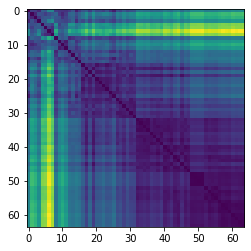

In [178]:
plt.imshow(dist_matrix)

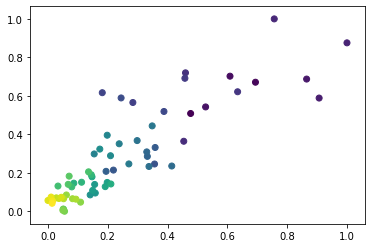

In [179]:
dist_mds = MDS(dissimilarity='precomputed')
dist_embedding = dist_mds.fit_transform(dist_matrix)

dist_embedding[:, 0] -= min(dist_embedding[:, 0])
dist_embedding[:, 1] -= min(dist_embedding[:, 1])

dist_embedding[:, 0] /= max(dist_embedding[:, 0])
dist_embedding[:, 1] /= max(dist_embedding[:, 1])

plt.scatter(dist_embedding[:, 0], dist_embedding[:, 1], c=np.linspace(0, 1, num=dist_embedding.shape[0]))
plt.show()

In [ ]:
print(br_values)
print(chi_values)

In [ ]:
keys = [
    { 'br': 0.5, 'chi': 2.8, 'version': 0 },
    { 'br': 0.5, 'chi': 2.8, 'version': 1 },
    { 'br': 0.56, 'chi': 3.4, 'version': 0 },
    { 'br': 0.56, 'chi': 3.4, 'version': 1 }
]

sigs = []
colors = []
color_options = ['r', 'b', 'k', 'c']
for kdx, key in enumerate(keys):
    color_option = color_options[kdx]
    traj = df[(df.BR == key['br']) & (df.CHI == key['chi']) & (df.version == key['version']) & (df.timestep != 0)]
    for idx, row in traj.iterrows():
        image = row.image.reshape((100, 400))
        comps = processing.extract_components(image, background=1)
        sig = processing.apply_to_components(comps, processing.perimeter_area_ratio_sig)
        if len(sig) == 0:
            continue
        sigs.append(sig)
        colors.append(color_option)

In [ ]:
dist_matrix = []

for sig_x in sigs:
    matrix_row = []
    for sig_y in sigs:
        matrix_row.append(emd_samples(sig_x, sig_y))
    dist_matrix.append(matrix_row)

dist_matrix = np.array(dist_matrix)

In [ ]:
dist_mds = MDS(dissimilarity='precomputed')
dist_embedding = dist_mds.fit_transform(dist_matrix)

# dist_embedding[:, 0] -= min(dist_embedding[:, 0])
# dist_embedding[:, 1] -= min(dist_embedding[:, 1])

# dist_embedding[:, 0] /= max(dist_embedding[:, 0])
# dist_embedding[:, 1] /= max(dist_embedding[:, 1])

plt.scatter(dist_embedding[:, 0], dist_embedding[:, 1], c=colors)
plt.show()

In [ ]:
plt.imshow(dist_matrix)